In [1]:
import matplotlib.pyplot as plt
import numpy as np


## Численное решение дифференциальных уравнений

Дифференциальными называются функциональные уравнения (т.е. искомым является функция), содержащие кроме искомой функции также ее производные.
Рассмотрим явное дифференциальное уравнение первого порядка, имеющее общий вид:
$$y'(t)=f(t,y).$$
Например, таковым явлется уравнение $y'(t)=y(t)$, явное решение которого известно: 
$y(t)=c\cdot e^t$, где $c$ - константа интегрирования.
Уже из примера видно, что чтобы получить единственное решение дифференциального уравнения первого порядка, 
нужно зафиксировать начальное условие,
т.е. зафиксировать значение $y(0)$.
Для нетривиальных диф. уравнений аналитическое решение в элементарных
функциях обычно не существует. 
Однако решение можно найти приближенно, воспользовавшись методами
численного интегрирования.
Рассмотрим простейший метод численного интегрирования - [метод Эйлера](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%AD%D0%B9%D0%BB%D0%B5%D1%80%D0%B0).

Решения дифференциального уравнения являются дифференциируемыми функциями, поэтому для них справедливо следующее представление в малой окрестности каждой точки $t$:
$$y(t+\delta)=y(t)+\delta y'(t)+o(\delta),\quad \delta\to0.$$
Отбрасывая бесконечно малое, можно получить приближенную формулу,
по которой можно находить значение в "следующий" момент времени,
зная значение в "предыдущий" момент времени.
При численном решении мы не можем найти решение во все моменты времени,
вместо этого мы вычисляем значения решения в дискретные моменты времени
$t_k$, которые мы считаем упорядоченными $t_k<t_{k+1}$.
В простейшем случае можно считать приращении времени постоянным, тогда
$t_k=t_0+\Delta\cdot k$, где $\Delta$ - шаг времени, а $t_0$ - начальный момент времени.

Зная значение функции и производной в момент времени $t_k$,
можно найти приближенное значение решения в момент времени $t_{k+1}$:
$$y_a(t_{k+1})=y_a(t_k)+(t_{k+1}-t_k)y_a'(t_k).$$
Подставляя значение производной из дифференциального уравнения,
получаем формулу нахождения решения по методу Эйлера:
$$y_a(t_{k+1})=y_a(t_k)+(t_{k+1}-t_k)f(t_k,y_a(t_k)).$$
Найденное таким образом решение $y_a(t)$ не совпадает с точным решением $y(t)$ уравнения.
Если выбрать значение $y_a(t)$ совпадающим с $y(t)$, то 
величина $h(\delta)=y_a(t+\delta)-y(t+\delta)$
характеризует точность одного шага данного метода интегрирования.
Точность методы выражаеют *порядком* метода, 
который выражает скорость уменьшения погрешности с уменьшением шага интегрирования.
Так на одном шаге интегрирования метод имеет порядок $\alpha$,
если $h(\delta)\sim \delta^\alpha$, т.е. $h(\delta)$ пропорционально степени $\alpha$ 
шага интегрирования $\alpha$,
Метод Эйлера имеет второй порядок точности одного шага интегрирования, если
решение достаточно гладкое.

Реализуем метод Эйлера.
Ограничимся только автономными системами, т.е. уравнениями вида
$$y'(t)=f(y(t)),$$
где функция $f$ явным образом не зависит от времени,
а зависит только от $y$.

In [2]:
def EulerIntegrator(h, y0, f):
    """
    Делает один шаг методом Эйлера.
    y0 - начальное значение решения в момент времени t=0,
    h - шаг по времения,
    f(y) - правая часть дифференциального уравнения.
    Возвращает приближенное значение y(h).
    """
    return y0 + h * f(y0)

def oneStepErrorPlot(f, y, integrator):
    """Рисует график зависимости погрешности одного шага
    интегрирования от длины шага.
    f(y) - правая часть дифференциального уравнения,
    y(t) - точное решение,
    integrator(h,y0,f) - аргументы аналогичны EulerIntegrator.
    """
    eps = np.finfo(float).eps
    steps = np.logspace(-10, 0, 50)  # шаги интегрирования
    y0 = y(0)  # начальное значение
    yPrecise = [y(t) for t in steps]  # точные значения решения
    yApproximate = [integrator(t, y0, f) for t in steps]  # приближенные решения
    h = [np.maximum(np.max(np.abs(yp - ya)), eps) for yp, ya in zip(yPrecise, yApproximate)]
    plt.loglog(steps, h, '-')
    plt.xlabel(u"Шаг интегрирования")
    plt.ylabel(u"Погрешность одного шага")

def firstOrderPlot():
    """Рисует на текущем графике прямую y=x."""
    ax = plt.gca()
    steps = np.asarray(ax.get_xlim())
    plt.loglog(steps, steps, '--r')


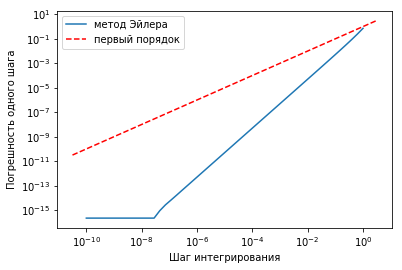

In [3]:
# Тестовая система.
# Правая часть уравнения y'=f(y).
f = lambda y: y
# Аналитическое решение
yExact = lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"первый порядок"], loc=2)
plt.show()


На практике величина шага интегрирования $\Delta$ является вспомогательной величиной,
изменение которой позволяет контролировать точность нахождения результата.
Интересуют же нас обычно значения функции на неком интервале $t\in[t_0,t_0+T]$.
Если мы используем равномерные приращения по времени $\Delta$, 
т.е. $t_k=t_0+k\cdot\Delta$, то для достижения правого конца $t_0+T$ интервала 
потребуется $N$ шагов длины $T/N$.
Каждый шаг интегрирования добавляет погрешность, а количество шагов растет
с уменьшением длины шага, поэтому можно ожидать, что точность нахождения 
численным методом решения уравнения на интервале отличается от точности 
одного шага интегрирования.
Пусть $y_a$ приближенное решение уравнения, полученное интегрированием с шагом $\delta$,
а $y$ - точное решение уравнения, тогда величину 
$H(\delta)=y_a(t_0+T)-y(t_0+T)$ будем называть погрешностью интегрирования на интервале.
Вычислим эту погрешность для метода Эйлера.

In [4]:
def integrate(N, delta, f, y0, integrator):
    """
    Делает N шагов длины delta метода integrator для уравнения y'=f(y) с начальными условиями y0.
    Возвращает значение решения в конце интервала.
    """
    for n in range(N):
        y0 = integrator(delta, y0, f)
    #         print(y0)
    return y0

def intervalErrorPlot(f, y, integrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16):
    """
    Рисует график зависимости погрешности интегрирования на интервале
    от длины шага интегрирвания.
    Аргументы повторяют аргументы oneStepErrorPlot.
    """
    eps = np.finfo(float).eps
    numberOfSteps = np.logspace(0, np.log10(maxNumberOfSteps), numberOfPointsOnPlot).astype(np.int)
    steps = float(T) / numberOfSteps  # шаги интегрирования

    y0 = y(0)  # начальное значение
    yPrecise = y(T)  # точное значения решения на правом конце
    yApproximate = [integrate(N, float(T) / N, f, y0, integrator) for N in numberOfSteps]  # приближенные решения
    h = [np.maximum(np.max(np.abs(yPrecise - ya)), eps) for ya in yApproximate]
    plt.loglog(steps, h, '.-')
    plt.xlabel(u"Шаг интегрирования")
    plt.ylabel(u"Погрешность интегрования на интервале")


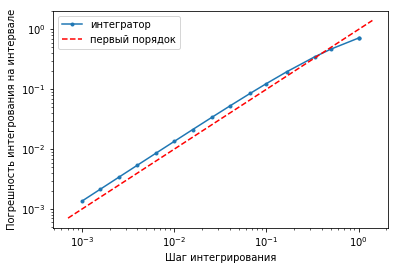

In [5]:
# Строим график ошибок
intervalErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"интегратор", u"первый порядок"], loc=2)
plt.show()


Как мы видим, на интервале метод Эйлера имеет первый порядок точности.
Существует однако ситуация, когда метод Эйлера дает точный ответ:
это происходит, когда производная постоянна.

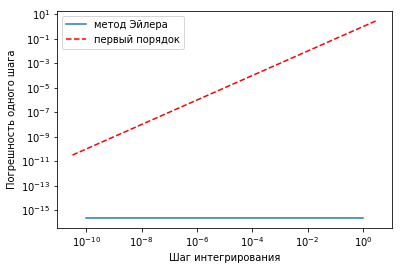

In [6]:
f = lambda y: 1
yExact = lambda t: t

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"первый порядок"], loc=2)
plt.show()


При приращении аргумента на некий шаг метод Эйлера приращает значение решения таким оразом, 
что производная остается постоянной и равной значению производной в начале шага.
Однако это вообще говоря очень грубое допущение. 
Чтобы получить более точный метод, мы можем ввести поправки на изменении производной.
Раскладывая решение по формуле Тейлора, получаем при малых $t$:
$$y(t)=y(0)+y'(0)t+y''(0)\frac{t^2}2+o(t^2).$$
Так $y'(t)=f(t,y(t))$, то дифференцируя по $t$, получаем:
$$y''(t)=\frac{\partial}{\partial t}f(t,y(t))+y'(t)\frac{\partial}{\partial y}f(t,y(t)).$$
Подставляя производные в разложение, получаем:
$$y(\delta)=y(0)+f(0,y(0))\delta+\left(\frac{\partial}{\partial t}f(0,y(0))
+f(0,y(0))\frac{\partial}{\partial y}f(0,y(0))\right)\frac{\delta^2}2+o(\delta^2).$$
Эта формула обновления позволяет получить решение в точке $t=\delta$, зная решение в точке $t=0$,
с погрешностью меньшей $\delta^2$. 
Это означает, что уменьшая шаг интегрирования в два раза, мы получаем точность выше более чем в 4 раза.
Тот же результат можно было получить, используя формулу Эйлера с шагом $\delta/4$.

In [7]:
def NewtonIntegrator(h,y0,f):
    """
    Делает один шаг методом Эйлера.
    y0 - начальное значение решения в момент времени t=0,
    h - шаг по времени,
    f(y) - правая часть дифференциального уравнения и его производная.
    Возвращает приближенное значение y(h).
    """
    return y0+h*f[0](y0)+f[0](y0)*f[1](y0)*h*h/2.

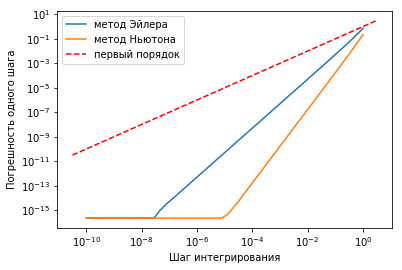

In [8]:
f = (lambda y: y, lambda y: 1)
# Аналитическое решение
yExact = lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, NewtonIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"метод Ньютона", u"первый порядок"], loc=2)
plt.show()


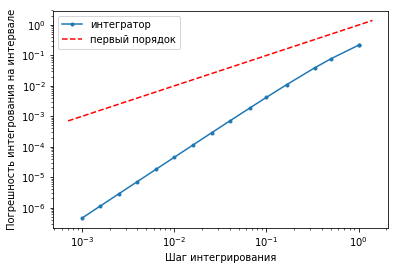

In [9]:
# Строим график ошибок
intervalErrorPlot(f, yExact, NewtonIntegrator)
firstOrderPlot()
plt.legend([u"интегратор", u"первый порядок"], loc=2)
plt.show()


Разложение решения по формуле Тейлора и подстановка производных из дифференциального уравнения 
позволяет получить формулу интегрирования по методу Ньютона произвольной точности.
Однако вычисления по этой формуле требуют вычисления производных правой части 
дифференциального уравнения, что может быть сложной аналитической и вычислительной задачей.
Существует другой способ получить метод такой же точности, но не требующий вычислять
производные правой части.
Рассмотрим сначала модифицированный метод Эйлера.

Модифицированный метод Эйлера вычисляет значение решения $y(\delta)$ по данному значению $y(0)$ с помощью следующей формулы:
$$y(\delta)=y(0)+f\left(\frac\delta2,y_{\frac\delta2}\right)\delta,$$
где $y_{\frac\delta2}$ - значение решение на половинном шаге $t=\delta/2$:
$$y_{\frac\delta2}=y(0)+f(0,y(0))\frac\delta2.$$
Т.е. значение производной на всем шаге считается постоянным, однако для более точной оценки
производной сначала находится приближенное значение решения на половине шага интегрирования,
которое и используется для вычисления производной из дифферецниального уравнения.

In [10]:
def ModifiedEulerIntegrator(h, y0, f):
    """
    Модифицированный метод Эйлера. 
    Аргументы аналогичны EulerIntegrator.
    """
    yIntermediate = y0 + f(y0) * h / 2
    return y0 + h * f(yIntermediate)


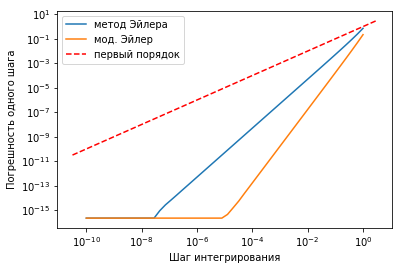

In [11]:
f = lambda y: y
yExact = lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, ModifiedEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"мод. Эйлер", u"первый порядок"], loc=2)
plt.show()


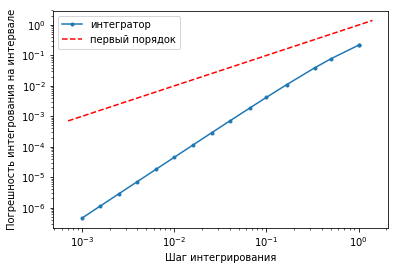

In [12]:
# Строим график ошибок
intervalErrorPlot(f, yExact, ModifiedEulerIntegrator)
firstOrderPlot()
plt.legend([u"интегратор", u"первый порядок"], loc=2)
plt.show()


Чтобы получить точность выше, мы должны найти больше промежуточных значений внутри одного шага интегрирования
и использовать эти значения для оценки производных высоких порядков.
Полученные таким образом методы относятся к семейству методов [Рунге-Кутты](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B).
Самой известным методом из этого классая является классический метод Рунге-Кутты четвертого порядка, использующий для вычислений четыре спомогательные точки. 
Соответствующая формула интегрирования 
для решения задачи
$$y'(t)=f(t,y(t)),\quad y(0)=y_0,$$
имеет вид:
$$y(\delta)=y(0)+\frac\delta6(k_1+2k_2+2k_3+k_4),$$
$$k_1=f(0,y(0)),$$
$$k_2=f\left(\frac\delta2,y(0)+\frac\delta2k_1\right),$$
$$k_3=f\left(\frac\delta2,y(0)+\frac\delta2k_2\right),$$
$$k_4=f\left(\delta,y(0)+\delta k_3\right).$$
Классический метод Рунге-Кутты удобен тем, что промежуточные шаги интегрирования делаются последовательно,
причем в памяти достаточно хранить только значение одного промежуточного шага.
Существуют однако более точные и более устойчивые варианты методы Рунге-Кутты.

In [13]:
def RungeKuttaIntegrator(h, y0, f):
    """
    Классический метод Рунге-Кутты четвертого порядка. 
    Аргументы аналогичны EulerIntegrator.
    """
    k1 = f(y0)
    k2 = f(y0 + k1 * h / 2)
    k3 = f(y0 + k2 * h / 2)
    k4 = f(y0 + k3 * h)
    return y0 + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6


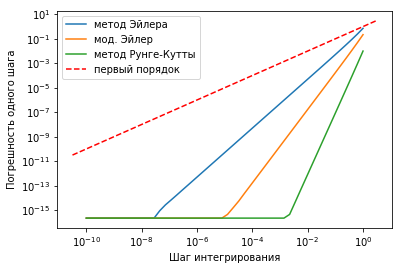

In [14]:
f = lambda y: y
yExact = lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, ModifiedEulerIntegrator)
oneStepErrorPlot(f, yExact, RungeKuttaIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"мод. Эйлер", u"метод Рунге-Кутты", u"первый порядок"], loc=2)
plt.show()


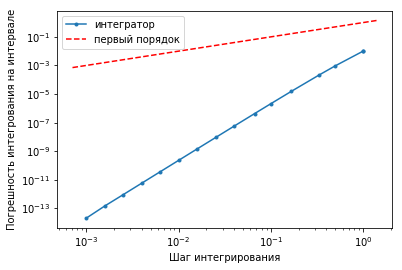

In [15]:
# Строим график ошибок
intervalErrorPlot(f, yExact, RungeKuttaIntegrator)
firstOrderPlot()
plt.legend([u"интегратор", u"первый порядок"], loc=2)
plt.show()


Рассмотренные выше методы относились к семейству явных методов, т.е. 
позволяли сразу вычислить значения решения по вышеприведенным формулам,
так как все величины в формулах были известны заранее.
Однако формулы интегрирования могут содержать искомое решение и в левой и правой частях,
тогда метод называют неявным.
Например, формулу интегрирования для методы Эйлера:
$$y(\delta)=y(0)+f(0,y(0))\delta,$$
можно было переписать так
$$y(\delta)=y(0)+f(\delta,y(\delta))\delta,$$
т.е. для приближения производной решения на шаге интегрирования используется точное значение производной в конце, а не в начале шага.
Для нахождения нового значения решения $y(\delta)$ в неявной схеме требуется решить уравнение,
поэтому неявные методы вычислительно более сложны, чем явные.
Однако неявные методы могут обладать привлекательными свойствами, такими как устойчивость и сохранение первых интегралов, что объясняет популяроность и важность этих методов.

Мы рализуем [неявный метод Эйлера](https://en.wikipedia.org/wiki/Backward_Euler_method), 
используя для решения уравнения [метод Ньютона]((https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0).

In [16]:
def NewtonMethod(F, x0):
    """
    Находит решение уравнения F(x)=0 методом Ньютона.
    x0 - начальное приближение.
    F=(F(x),dF(x)) - функция и ее производная.
    Возвращает решение уравнения.
    """
    for i in range(100):  # ограничиваем максимальное число итераций
        x = x0 - F[0](x0) / F[1](x0)
        if x == x0: break  # достигнута максимальная точность
        x0 = x
    return x0

def BackwardEulerIntegrator(h, y0, f):
    """
    Неявный метод Эйлера. 
    Аргументы аналогичны NewtonIntegrator.
    """
    F = (lambda y: y0 + h * f[0](y) - y, lambda y: h * f[1](y) - 1)
    return NewtonMethod(F, y0)


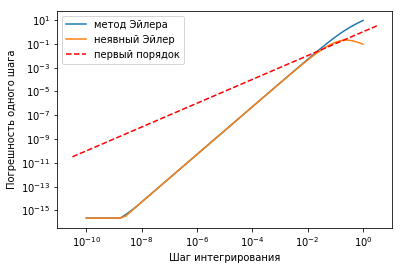

In [17]:
alpha = -10
f = (lambda y: alpha * y, lambda y: alpha)
yExact = lambda t: np.exp(alpha * t)

# Строим график ошибок
oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, BackwardEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"неявный Эйлер", u"первый порядок"], loc=2)
plt.show()


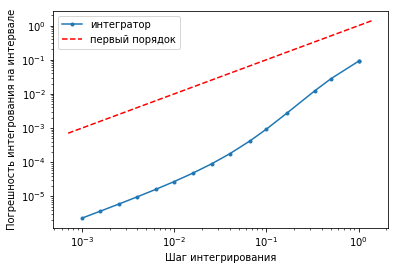

In [18]:
# Строим график ошибок
intervalErrorPlot(f, yExact, BackwardEulerIntegrator)
firstOrderPlot()
plt.legend([u"интегратор", u"первый порядок"], loc=2)
plt.show()


Мы видим, что и явный, и неявный метод Эйлера имеют один порядок.
Однако неявный методы более устойчив, поэтому дает более точный ответ при 
больших шагах интегрирования.
Различие еще более заметно, если нужно сделать несколько шагов интегрирования.

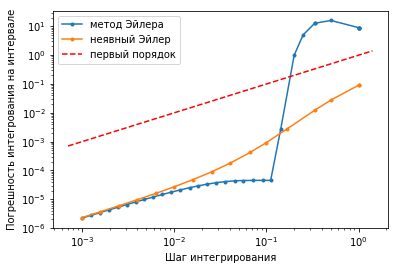

In [19]:
intervalErrorPlot(f[0], yExact, EulerIntegrator, numberOfPointsOnPlot=32)
intervalErrorPlot(f, yExact, BackwardEulerIntegrator, numberOfPointsOnPlot=16)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"неявный Эйлер", u"первый порядок"], loc=2)
plt.show()


In [20]:
c = 1.226191170

In [21]:
yExact(0)

1.0

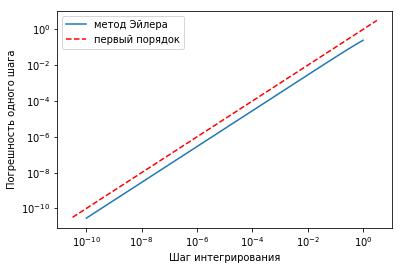

In [22]:
# Тестовая система.
# Правая часть уравнения y'=f(y).
f = lambda y: np.cos(y)

# Аналитическое решение
yExact = lambda t: 2 * (np.tan(np.tanh((t / 2.) + (np.tanh(np.tan(1 / 2.)) ** (-1)))) ** (-1))

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"первый порядок"], loc=2)
plt.show()


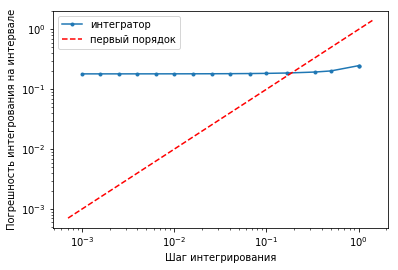

In [23]:
# Строим график ошибок
intervalErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"интегратор", u"первый порядок"], loc=2)
plt.show()


In [24]:
c = np.log((1 + np.tan(1 / 2)) / (1 - np.tan(1 / 2)))
print('Значение коэффициента С=', c)


Значение коэффициента С= 1.226191170883517


In [25]:
# Проверка значения коэффициента С
print(2 * (np.arctan(np.tanh(((c + 0) / 2)))))


1.0


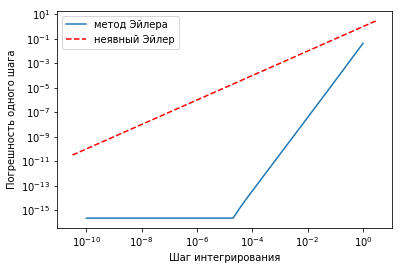

In [26]:
f = (lambda t: np.cos(t), lambda t: -np.sin(t))

# Аналитическое решение
yExact = lambda t: 2 * (np.arctan(np.tanh(0.5 * (c + t))))

# Строим график ошибок
# oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, NewtonIntegrator)
# oneStepErrorPlot(f[0], yExact, RungeKuttaIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера", u"неявный Эйлер", u"первый порядок"], loc=2)
plt.show()


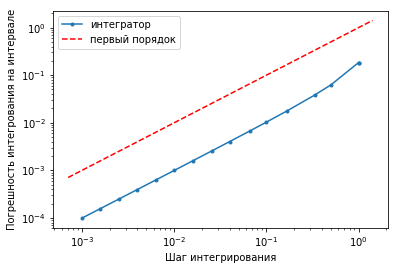

In [27]:
# Строим график ошибок
intervalErrorPlot(f[0], yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"интегратор", u"первый порядок"], loc=2)
plt.show()
